In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
import matplotlib.ticker as ticker
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from nltk.util import ngrams

In [2]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [3]:
turkish_stopwords = set(stopwords.words('turkish'))
print(sorted(turkish_stopwords))

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'da', 'daha', 'de', 'defa', 'diye', 'en', 'eğer', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'ile', 'ise', 'için', 'kez', 'ki', 'kim', 'mu', 'mü', 'mı', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niye', 'niçin', 'o', 'sanki', 'siz', 'tüm', 've', 'veya', 'ya', 'yani', 'çok', 'çünkü', 'şey', 'şu']


In [4]:
ozel_stoplar = {'bir','beden','elbise','göğüs','üst'}
stop_words = set(turkish_stopwords).union(ozel_stoplar)

In [5]:
products_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\02_Data_Cleaning\\Data", "products_cleaned.csv") 

df_products = pd.read_csv(products_path)

df_products.head()

,Ürün Adı,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,Ürün Detayı,Cep,Koleksiyon,Astar Durumu,Boy,Siluet,Ortam,Dokuma Tipi,Baskı/Nakış Tekniği,Kemer/Kuşak Durumu,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Ek Özellik,Kapama Şekli,Kalınlık
0,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,Sırt Dekolteli,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Gofre,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,Kış,NaN,NaN,NaN
1,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,Örme,NaN,Slim,Kısa,Fashion Forward,Standart Kol,Düz,Bisiklet Yaka,Siyah,NaN,NaN,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Kalın Sandy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN
3,TRENDYOLMİLLA Geometrik Desenli Maxi Dokuma Püsküllü Plaj Elbisesi TBESS24EL00166,Dokuma,Dokuma,Regular,Kısa,Cool & Comfort,Standart Kol,Geometrik,Hakim Yaka,Çok Renkli,NaN,Cepsiz,NaN,Astarsız,Midi,Skater,Beachwear,Mesh,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Yaz,NaN,NaN,NaN
4,TRENDYOLMİLLA Siyah Fitted/Vücuda Oturan Askılı Maxi Esnek Örme Kalem Elbise TWOSS23EL02435,Örme,Elastan,Slim,Askılı,Fashion Forward,Standart Kol,Düz,Kare Yaka,Siyah,NaN,Cepsiz,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Kalın Sandy,Baskısız,Kemersiz,Hayır,Tekli,Tüm Yaş Grupları,NaN,NaN,NaN,NaN


In [6]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\03_Data_Labelization\\Data", "comments_final_labels.csv") 

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2,savasy_label,savasy_skor,bayrameker_label,bayrameker_skor,bert_label,bert_skor,joeddav_label,joeddav_skor,kaixkhazaki_label,kaixkhazaki_skor,MoritzLaurer_label,MoritzLaurer_skor,ZeroShot_label,ZeroShot_skor,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.931962,olumlu,0.963947,olumlu,0.947954,olumlu,0.997684,olumlu,0.930659,olumlu,0.984298,olumlu,0.970880,olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumsuz,-0.669085,olumlu,0.991367,olumlu,0.161141,olumlu,0.936270,olumlu,0.857906,olumsuz,-0.775901,olumlu,0.339425,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumsuz,-0.964131,olumlu,0.924904,olumsuz,-0.019614,olumlu,0.990739,olumlu,0.886708,olumlu,0.897199,olumlu,0.924882,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.906424,olumlu,0.974138,olumlu,0.940281,olumlu,0.993717,olumlu,0.956035,olumlu,0.985931,olumlu,0.978561,olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.999406,olumlu,0.791039,olumsuz,-0.104184,olumsuz,-0.631333,olumlu,0.595040,olumsuz,-0.520216,olumsuz,-0.185503,olumsuz,-0.144843


In [7]:
columns_to_use = ['Tarih','Boy','Kilo','Beden' ,'Ürün Adı', 'Yorum_V1',  'final_label', 'final_skor']

df_comments = df_comments[columns_to_use].copy()

df_comments.head()

,Tarih,Boy,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor
0,17 Şubat 2025,168cm,55,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",olumlu,0.959417
1,14 Şubat 2025,165cm,59,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,olumlu,0.250283
2,23 Aralık 2024,168cm,60,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,olumlu,0.924882
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",olumlu,0.959421
4,01 Şubat 2025,157cm,46,S,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,olumsuz,-0.144843


In [8]:
df_olumsuz = df_comments[df_comments['final_label']== 'olumsuz']

pattern = r'\b(göğüs\w*|göğs\w*|üst\w*)\b'

df_ust_gogus= df_olumsuz[
    df_olumsuz['Yorum_V1'].str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)
]

df_ust_gogus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2402 entries, 162 to 109107
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tarih        2402 non-null   object 
 1   Boy          2402 non-null   object 
 2   Kilo         2402 non-null   object 
 3   Beden        2402 non-null   object 
 4   Ürün Adı     2402 non-null   object 
 5   Yorum_V1     2402 non-null   object 
 6   final_label  2402 non-null   object 
 7   final_skor   2402 non-null   float64
dtypes: float64(1), object(7)
memory usage: 168.9+ KB


C:\Users\SILA\AppData\Local\Temp\ipykernel_13036\315923653.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_olumsuz['Yorum_V1'].str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)


In [9]:
df_merged = df_ust_gogus.merge(df_products, on='Ürün Adı', how='left', indicator=True)

df_merged['Kontrol_Eslesme'] = df_merged['_merge'] == 'both'

df_merged.drop(columns=['_merge'], inplace=True)

df_merged.head()

,Tarih,Boy_x,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,Ürün Detayı,Cep,Koleksiyon,Astar Durumu,Boy_y,Siluet,Ortam,Dokuma Tipi,Baskı/Nakış Tekniği,Kemer/Kuşak Durumu,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Ek Özellik,Kapama Şekli,Kalınlık,Kontrol_Eslesme
0,13 Ağustos 2024,167cm,50,L,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,L beden alırken terddüt etmiştim ama cuk oldu sadece kumaşı biraz ince çok esnediği zaman iç gösteriyor ama üstünüzde hiç yokmuş gibi ağırlık yapmıyor,olumsuz,-0.093703,Örme,NaN,Slim,Kısa,Fashion Forward,Standart Kol,Düz,Bisiklet Yaka,Siyah,NaN,NaN,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Kalın Sandy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,20 Aralık 2024,167cm,65,40,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,Boyum 167 kilom 65.5 civarı normalde milladan elbiselerimi m beden alırdım ama yorumlarda alt kısmı dar olduğu söylendiği için l beden aldım bu sefer benim göbeğim ve basenim fazla olmasına rağmen alt kısmı bol oldu aşırı bol bir görüntü yok ama basen kısmında boşluk görünüyor kendi bedeninizi alın çünkü benim üstüme oturmadı ama acil lazım olduğu i,olumsuz,-0.803850,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
2,15 Ağustos 2024,163cm,72,40,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,İade etmedim ama çok da içime sinmedi üst tarafı biraz fazla büyük geldi.,olumsuz,-0.530942,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
3,19 Temmuz 2024,Bilgi mevcut değil,Bilgi mevcut değil,38,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,"Üst bedeni tam beden, ama alt bedeni çok dar",olumsuz,-0.533416,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
4,15 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,34,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,Üstü 2 beden büyük ama etek tam beden. Çok saçma bir bedeni var.,olumsuz,-0.503150,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True


In [10]:
df_ust_gogus = df_merged

In [11]:
df_ust_gogus.head(10)

,Tarih,Boy_x,Kilo,Beden,Ürün Adı,Yorum_V1,final_label,final_skor,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,Ürün Detayı,Cep,Koleksiyon,Astar Durumu,Boy_y,Siluet,Ortam,Dokuma Tipi,Baskı/Nakış Tekniği,Kemer/Kuşak Durumu,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Ek Özellik,Kapama Şekli,Kalınlık,Kontrol_Eslesme
0,13 Ağustos 2024,167cm,50,L,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097,L beden alırken terddüt etmiştim ama cuk oldu sadece kumaşı biraz ince çok esnediği zaman iç gösteriyor ama üstünüzde hiç yokmuş gibi ağırlık yapmıyor,olumsuz,-0.093703,Örme,NaN,Slim,Kısa,Fashion Forward,Standart Kol,Düz,Bisiklet Yaka,Siyah,NaN,NaN,Ramadan,Astarsız,Maxi,Bodycone,Casual/Günlük,Kalın Sandy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,20 Aralık 2024,167cm,65,40,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,Boyum 167 kilom 65.5 civarı normalde milladan elbiselerimi m beden alırdım ama yorumlarda alt kısmı dar olduğu söylendiği için l beden aldım bu sefer benim göbeğim ve basenim fazla olmasına rağmen alt kısmı bol oldu aşırı bol bir görüntü yok ama basen kısmında boşluk görünüyor kendi bedeninizi alın çünkü benim üstüme oturmadı ama acil lazım olduğu i,olumsuz,-0.803850,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
2,15 Ağustos 2024,163cm,72,40,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,İade etmedim ama çok da içime sinmedi üst tarafı biraz fazla büyük geldi.,olumsuz,-0.530942,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
3,19 Temmuz 2024,Bilgi mevcut değil,Bilgi mevcut değil,38,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,"Üst bedeni tam beden, ama alt bedeni çok dar",olumsuz,-0.533416,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
4,15 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,34,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,Üstü 2 beden büyük ama etek tam beden. Çok saçma bir bedeni var.,olumsuz,-0.503150,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
5,19 Aralık 2024,158cm,53,36,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,s beden almıştım ancak bana çok kısa oldu üst kısmı da bir tık bol oldu orantısızlık vardı üzülerek iade,olumsuz,-0.494629,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
6,02 Mayıs 2023,Bilgi mevcut değil,Bilgi mevcut değil,Bilgi mevcut değil,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,Alt kısmı oturuyor. Üst kısmı bol oldu. Vücut tipimden dolayı.,olumsuz,-0.850869,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsız,Kısa,Bodycone,Şık/Gece,Rigid,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,Ek Özellik Mevcut Değil,NaN,NaN,True
7,04 Aralık 2024,170cm,50,34,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643,malesef elbisenin kalibinda sorun var üst bol alt dar bir de kalın bir kumaşı var kalın olması degil sorun kumaşın sert olmasi üzülerek iade ediyorum,olumsuz,-0.827202,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,NaN,Cepsiz,NaN,Astarsı

WordCloud

In [12]:
def generate_wordcloud(df, label_column, text_column, label_value, title):
    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str))

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False,
        stopwords=stop_words,
        font_path='C:/Windows/Fonts/arial.ttf'  
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

In [13]:
def en_sik_20_kelime(df, label_column, text_column, label_value):
    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str)).lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    kelimeler = text.split()
    
    temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]
    
    en_sik = Counter(temiz_kelimeler).most_common(20)

    print(f"\n {label_value.upper()} yorumlarda en sık geçen 20 kelime:")
    for kelime, adet in en_sik:
        print(f"{kelime}: {adet}")

In [14]:
def en_sik_bigram(df, label_column, text_column, label_value, ilk_kac=20):

    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str)).lower()

    text = re.sub(r'[^\w\s]', '', text)

    kelimeler = text.split()

    temiz_kelimeler = [kelime for kelime in kelimeler if kelime not in stop_words]

    bigrams = ngrams(temiz_kelimeler, 2)

    bigram_counts = Counter(bigrams).most_common(ilk_kac)

    print(f"\n {label_value.upper()} yorumlarda en sık geçen {ilk_kac} ikili kelime öbeği:")
    for (kelime1, kelime2), adet in bigram_counts:
        print(f"{kelime1} {kelime2}: {adet}")

In [15]:
def bigram_wordcloud(df, label_column, text_column, label_value):

    text = " ".join(df[df[label_column] == label_value][text_column].dropna().astype(str)).lower()
    text = re.sub(r'[^\w\s]', '', text)
    kelimeler = text.split()
    temiz_kelimeler = [k for k in kelimeler if k not in stop_words]
    
    bigrams = ngrams(temiz_kelimeler, 2)
    bigram_counts = Counter(bigrams)
    
    bigram_dict = {" ".join(kelime): frekans for kelime, frekans in bigram_counts.items()}
    
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False,
        font_path='C:/Windows/Fonts/arial.ttf'  
    ).generate_from_frequencies(bigram_dict)
    
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{label_value.upper()} yorumlar için Bigram Word Cloud", fontsize=18)
    plt.show()

In [16]:
en_sik_20_kelime(df_ust_gogus, 'final_label', 'Yorum_V1', 'olumsuz')


 OLUMSUZ yorumlarda en sık geçen 20 kelime:
kısmı: 1004
iade: 877
büyük: 559
dar: 504
oldu: 471
bol: 462
tam: 436
aldım: 416
güzel: 395
geldi: 378
değil: 317
küçük: 311
var: 310
duruyor: 288
kumaşı: 283
biraz: 263
alt: 260
ürün: 252
kötü: 250
aşırı: 234


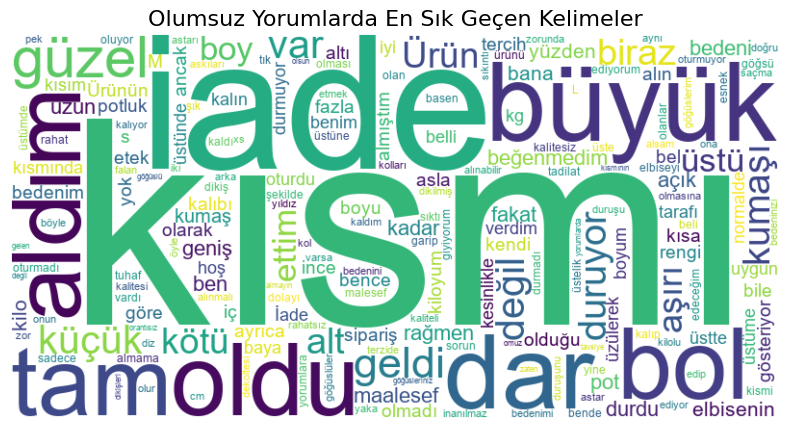

In [17]:
generate_wordcloud(df_ust_gogus, label_column='final_label', text_column='Yorum_V1', label_value='olumsuz', title='Olumsuz Yorumlarda En Sık Geçen Kelimeler')

In [18]:
en_sik_bigram(df_ust_gogus, 'final_label', 'Yorum_V1', 'olumsuz')


 OLUMSUZ yorumlarda en sık geçen 20 ikili kelime öbeği:
iade ettim: 171
kısmı dar: 117
tam oldu: 102
kısmı bol: 93
bol oldu: 75
bol geldi: 74
alt kısmı: 70
üzülerek iade: 64
dar geldi: 62
yüzden iade: 60
dar oldu: 57
pot duruyor: 56
iade ediyorum: 54
kısmı pot: 53
iade edeceğim: 52
büyük geldi: 51
kısmı aşırı: 51
aşırı bol: 50
almama rağmen: 50
iç gösteriyor: 45


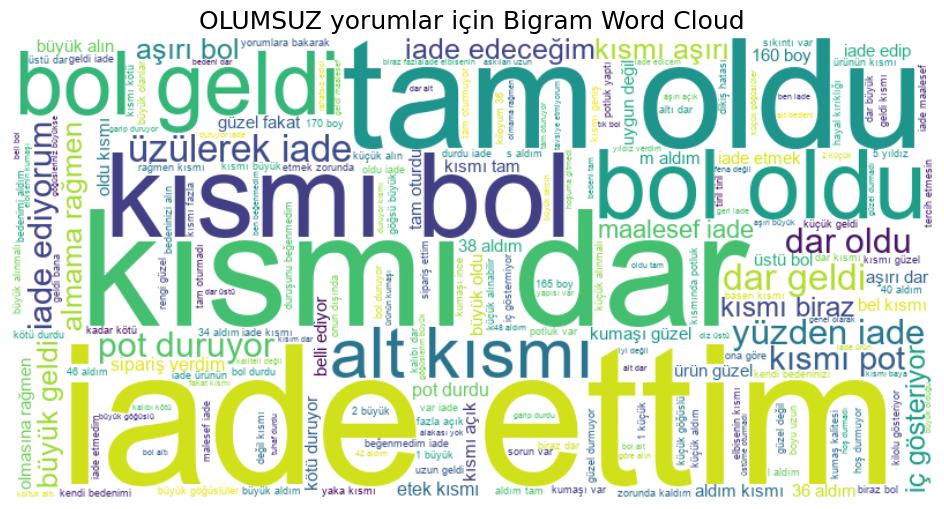

In [19]:
bigram_wordcloud(df_ust_gogus, 'final_label', 'Yorum_V1', 'olumsuz')

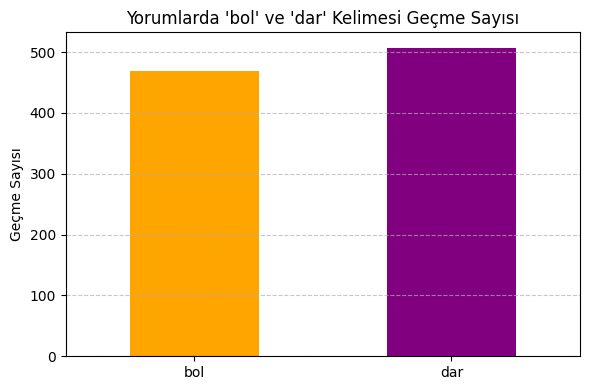

In [20]:
yorumlar = df_ust_gogus['Yorum_V1'].str.lower().dropna()

bol_sayisi = yorumlar.str.count(r'\bbol\b').sum()
dar_sayisi = yorumlar.str.count(r'\bdar\b').sum()

frekanslar = pd.Series({'bol': bol_sayisi, 'dar': dar_sayisi})

plt.figure(figsize=(6, 4))
frekanslar.plot(kind='bar', color=['orange', 'purple'])
plt.title("Yorumlarda 'bol' ve 'dar' Kelimesi Geçme Sayısı")
plt.ylabel("Geçme Sayısı")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

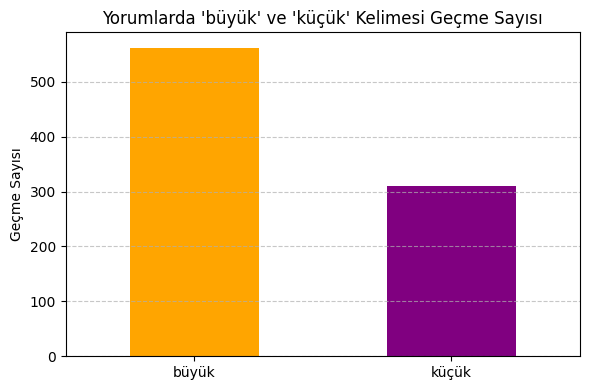

In [24]:
yorumlar = df_ust_gogus['Yorum_V1'].str.lower().dropna()

büyük_sayisi = yorumlar.str.count(r'\bbüyük\b').sum()
kücük_sayisi = yorumlar.str.count(r'\bküçük\b').sum()

frekanslar = pd.Series({'büyük': büyük_sayisi, 'küçük': kücük_sayisi})

plt.figure(figsize=(6, 4))
frekanslar.plot(kind='bar', color=['orange', 'purple'])
plt.title("Yorumlarda 'büyük' ve 'küçük' Kelimesi Geçme Sayısı")
plt.ylabel("Geçme Sayısı")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Product Features

In [21]:
kolonlar = ['Kumaş Tipi', 'Materyal', 'Kalıp', 'Kol Boyu', 'Persona', 'Kol Tipi', 'Desen',
            'Yaka Tipi', 'Renk', 'Ürün Detayı', 'Cep', 'Koleksiyon', 'Astar Durumu', 'Boy_y',
            'Siluet', 'Ortam', 'Dokuma Tipi', 'Baskı/Nakış Tekniği', 'Kemer/Kuşak Durumu',
            'Sürdürülebilirlik Detayı', 'Paket İçeriği', 'Yaş', 'Sezon',
            'Ek Özellik', 'Kapama Şekli', 'Kalınlık']

In [ ]:
def ozellik_grafikleri_tam(df, kolonlar):
    for kolon in kolonlar:
        if kolon not in df.columns:
            print(f"'{kolon}' kolon bulunamadı, atlanıyor.")
            continue

        seri = df[kolon].dropna()
        if seri.empty:
            print(f"'{kolon}' kolonu tamamen boş, atlanıyor.")
            continue

        sayilar = seri.value_counts()
        
        plt.figure(figsize=(10, 5))
        ax = sayilar.plot(kind='bar', color='skyblue')
        plt.title(f"{kolon} - Tüm Değerlerin Adetleri (Toplam {len(sayilar)})")
        plt.ylabel("Adet")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.5)

        for i, v in enumerate(sayilar.values):
            ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

        plt.show()


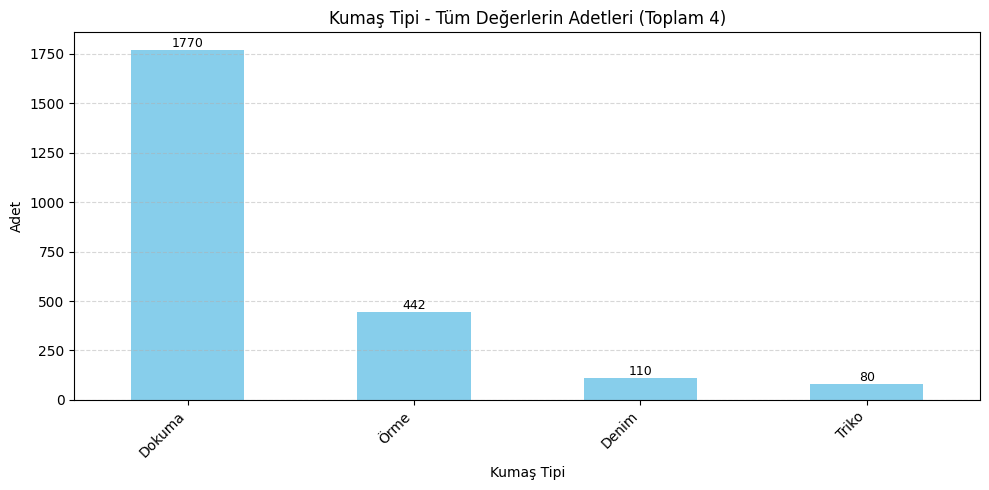

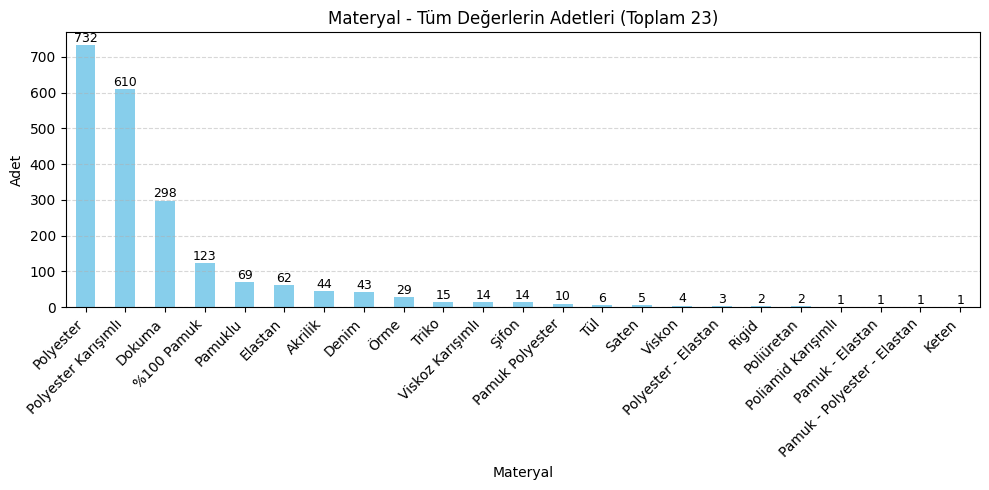

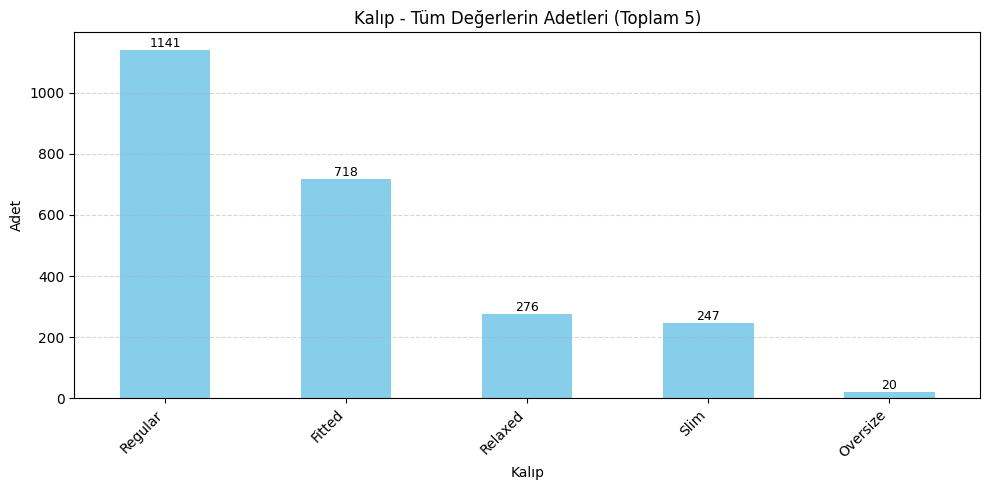

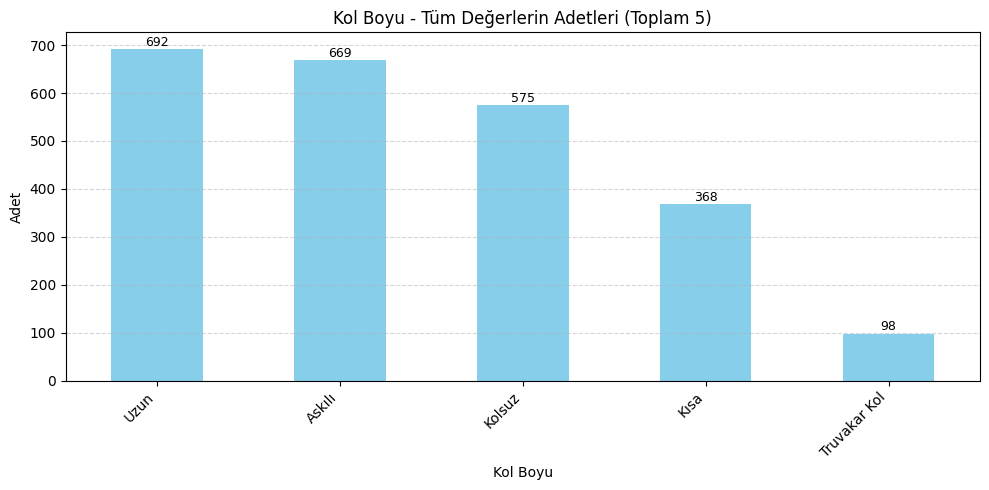

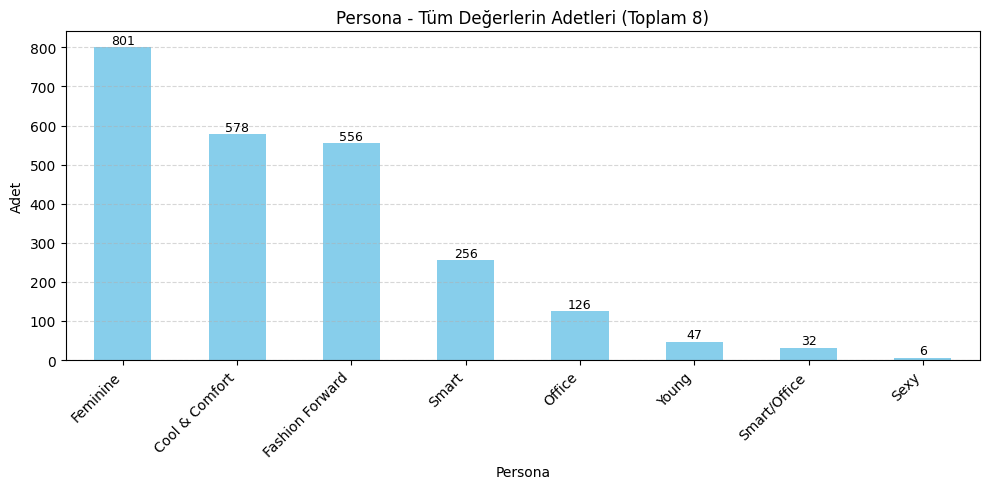

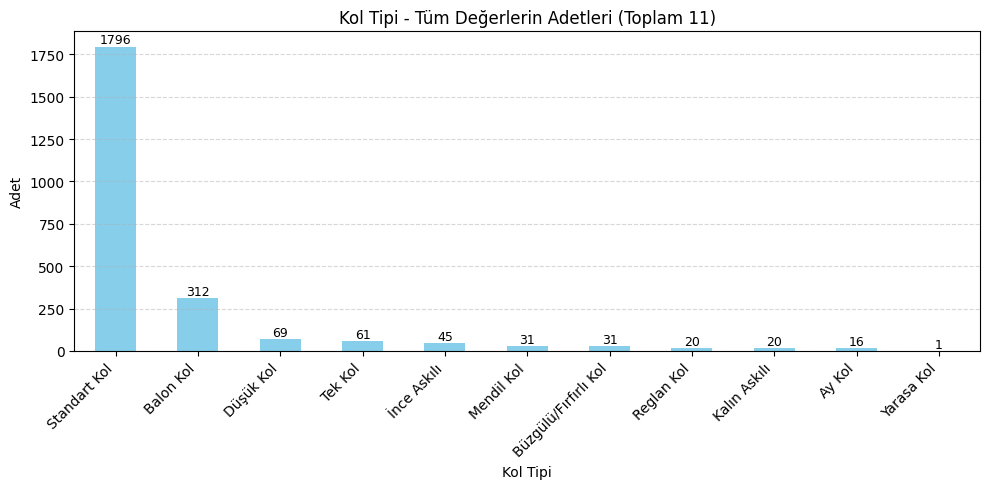

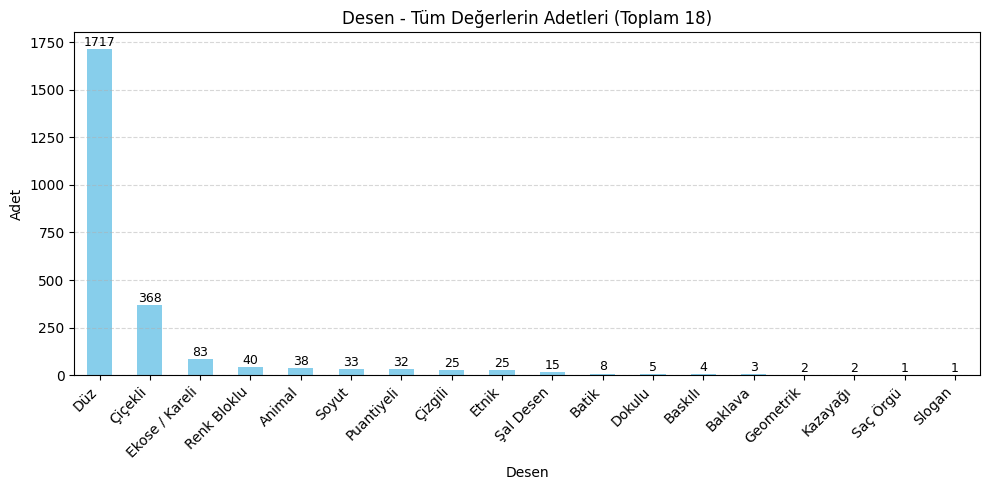

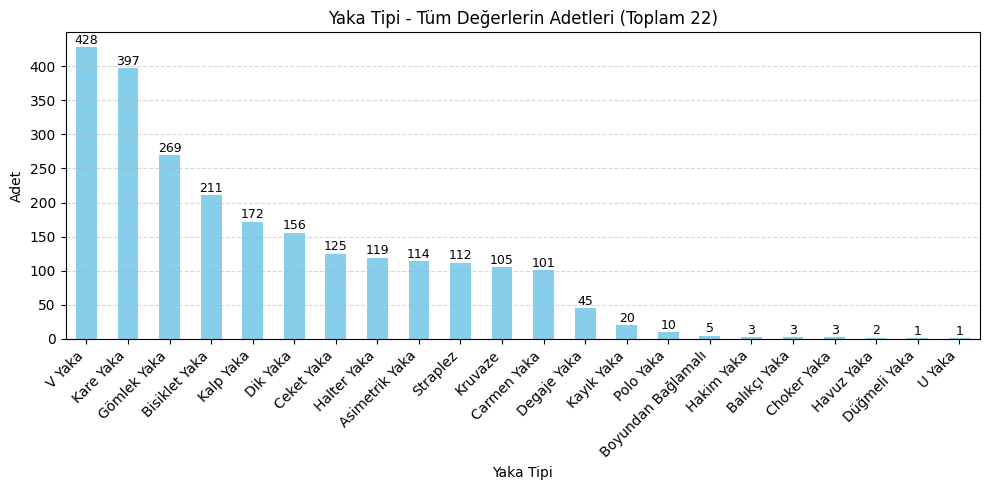

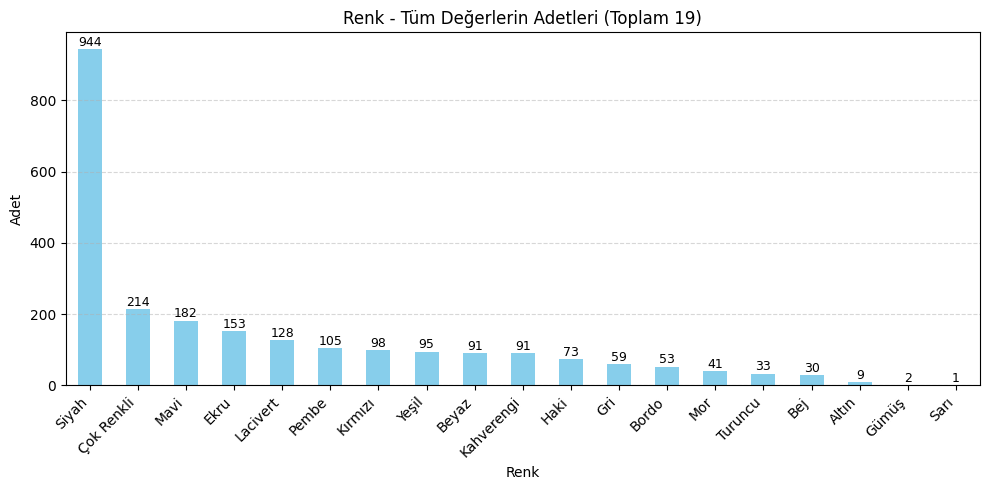

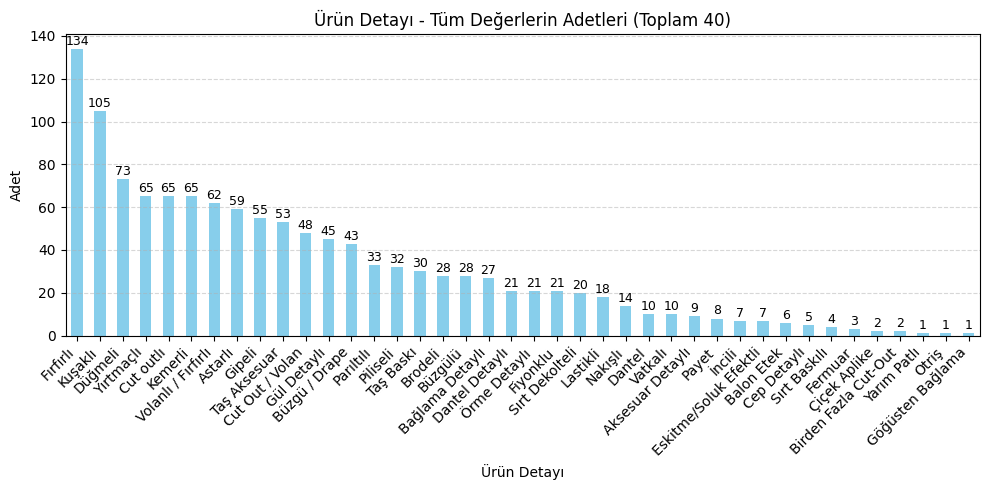

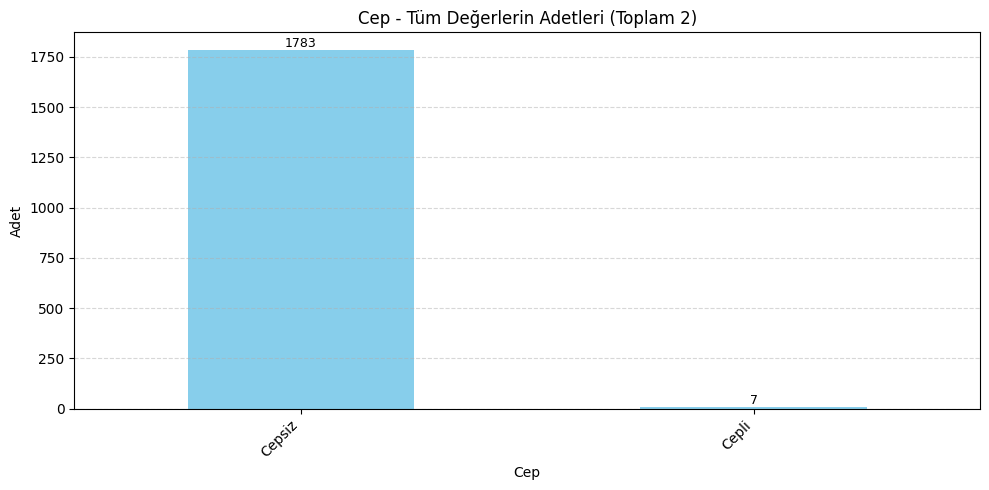

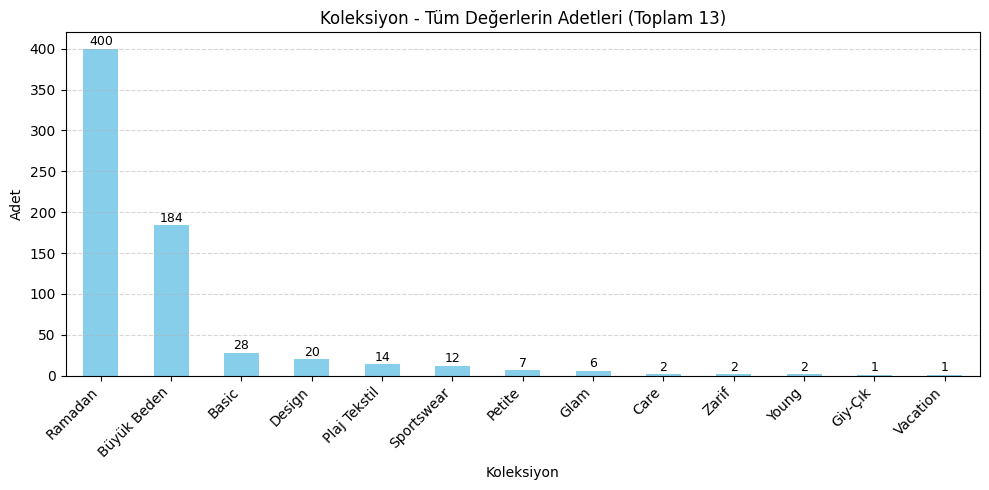

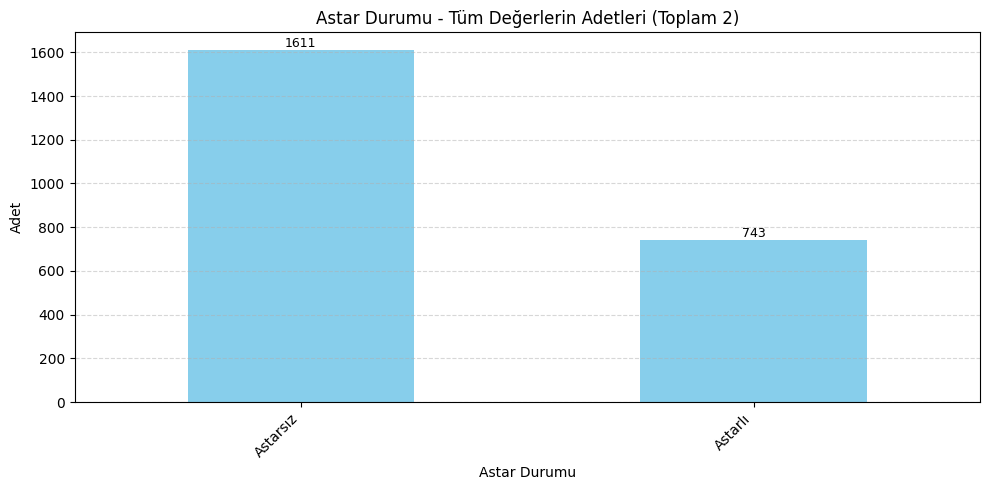

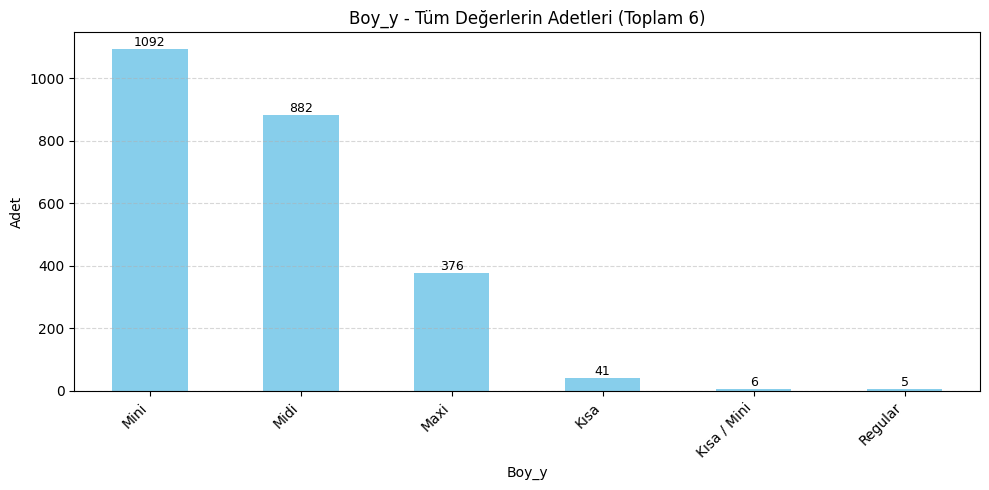

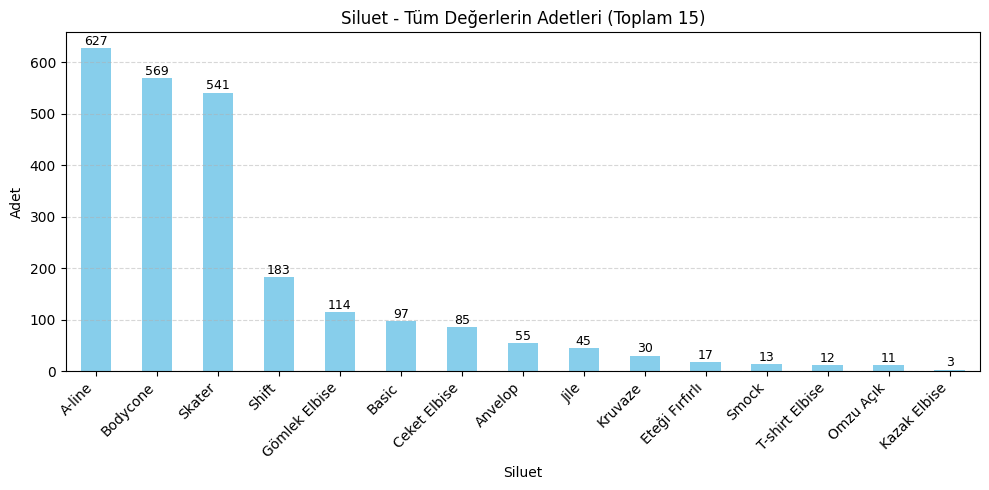

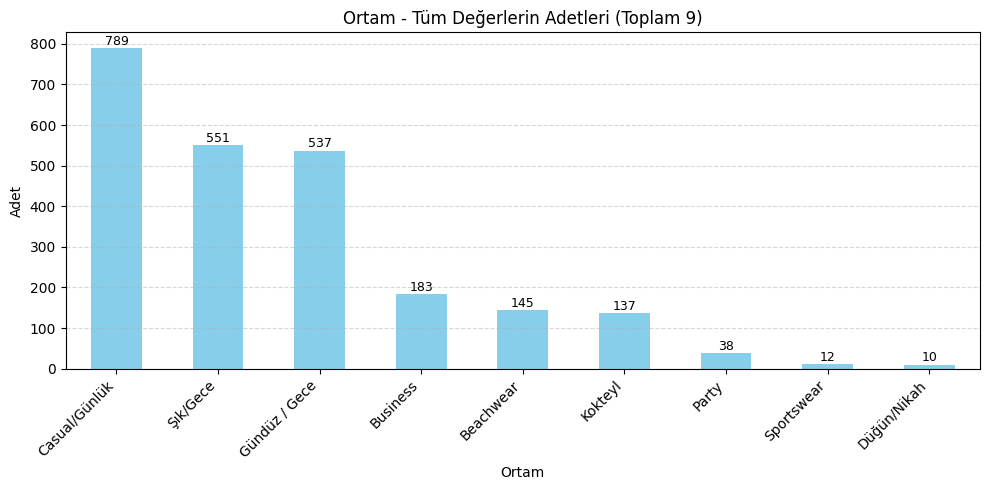

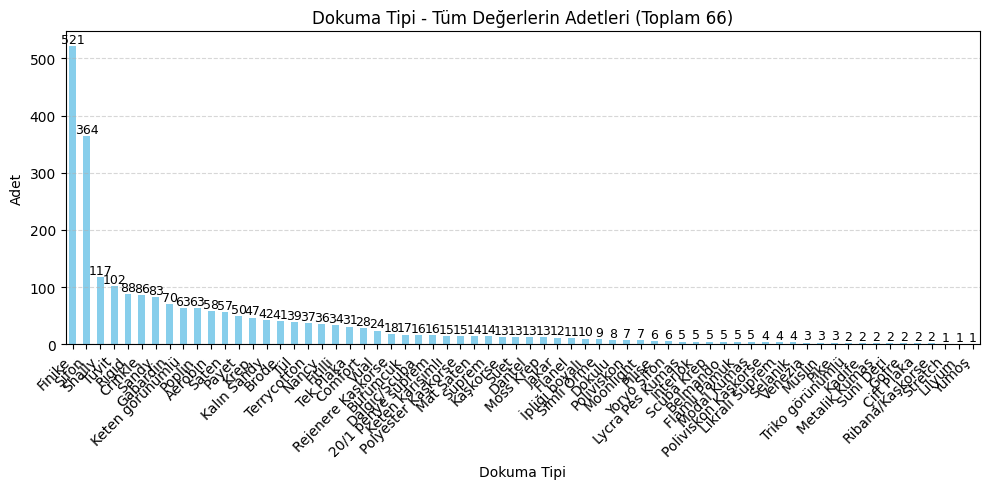

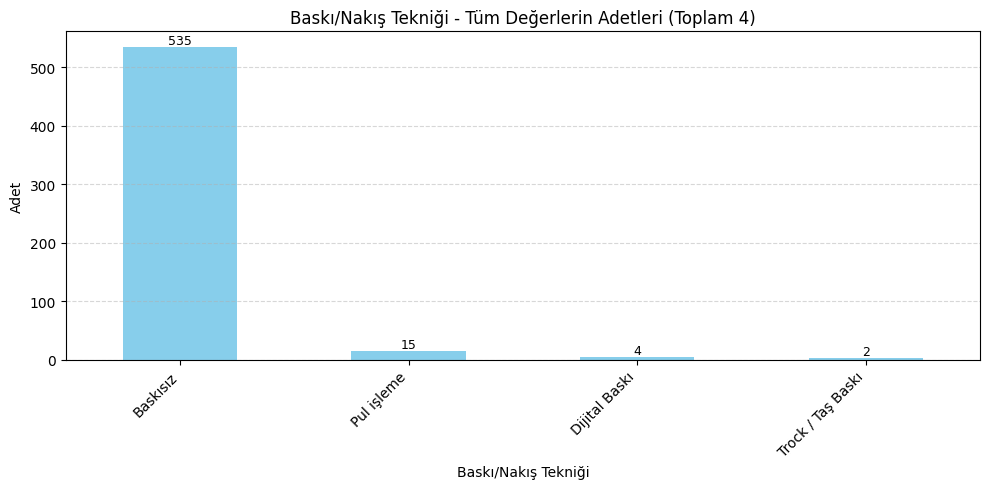

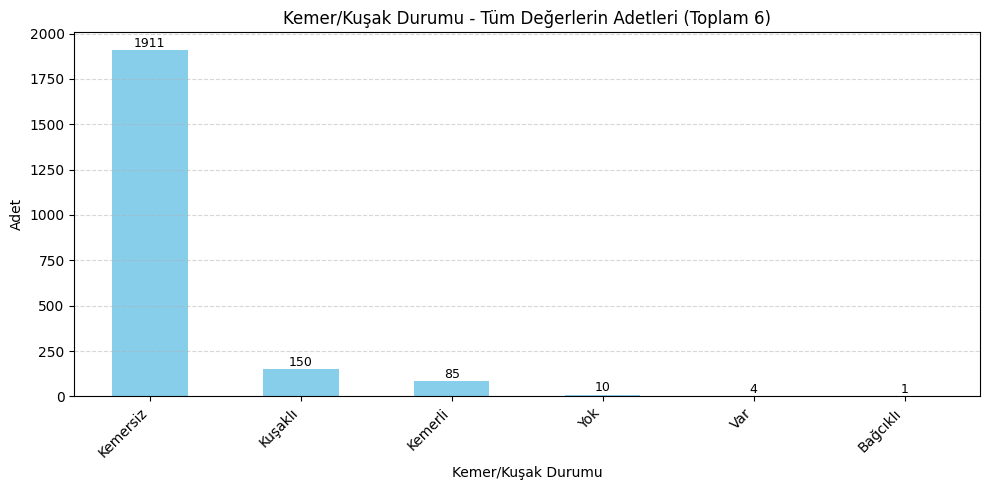

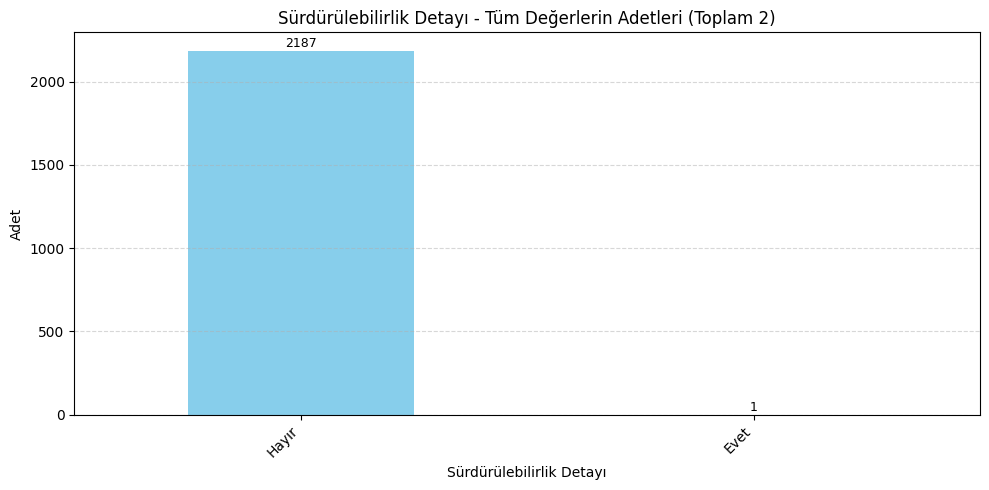

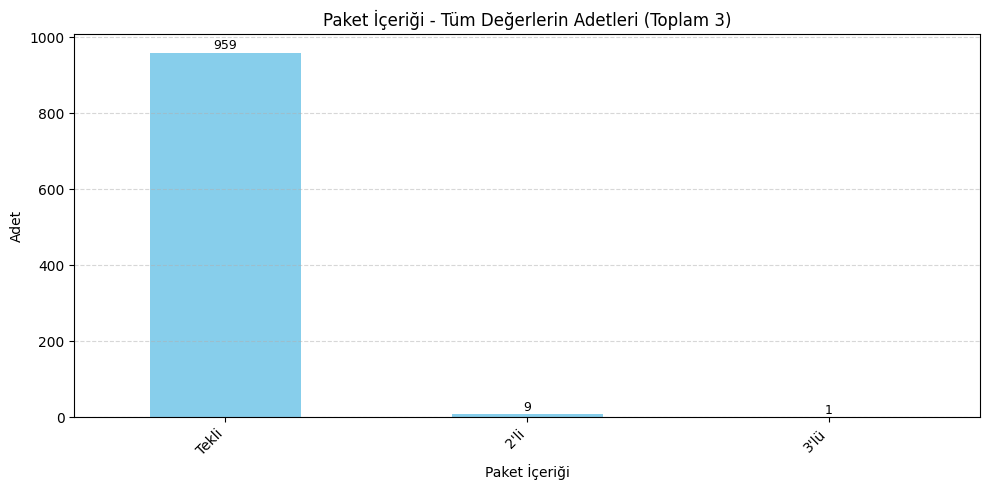

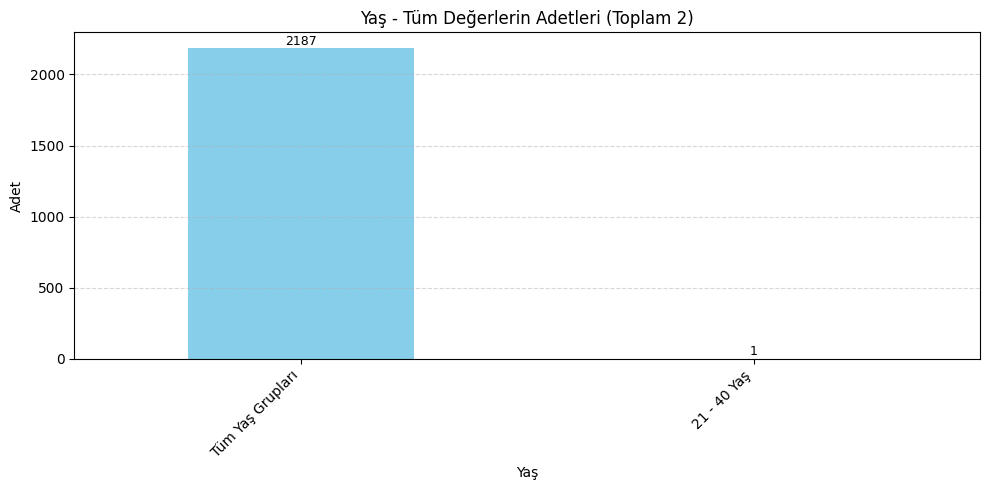

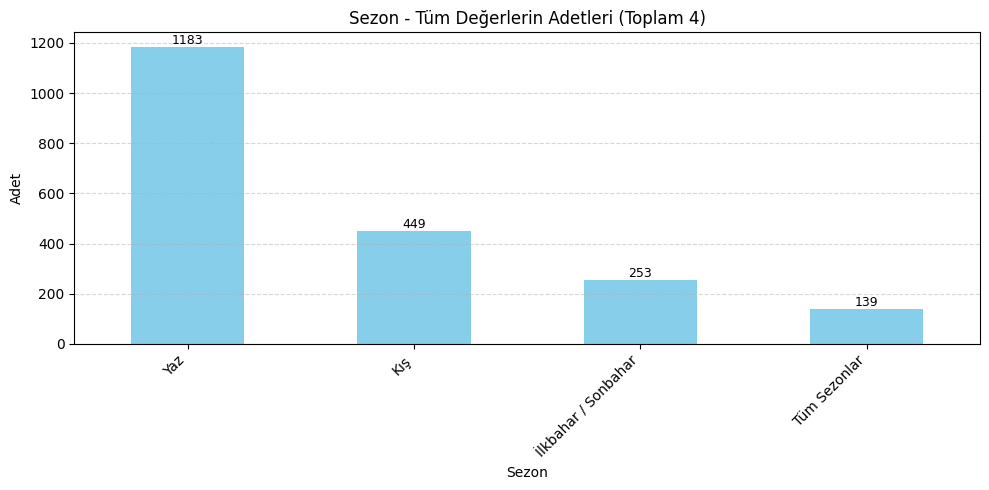

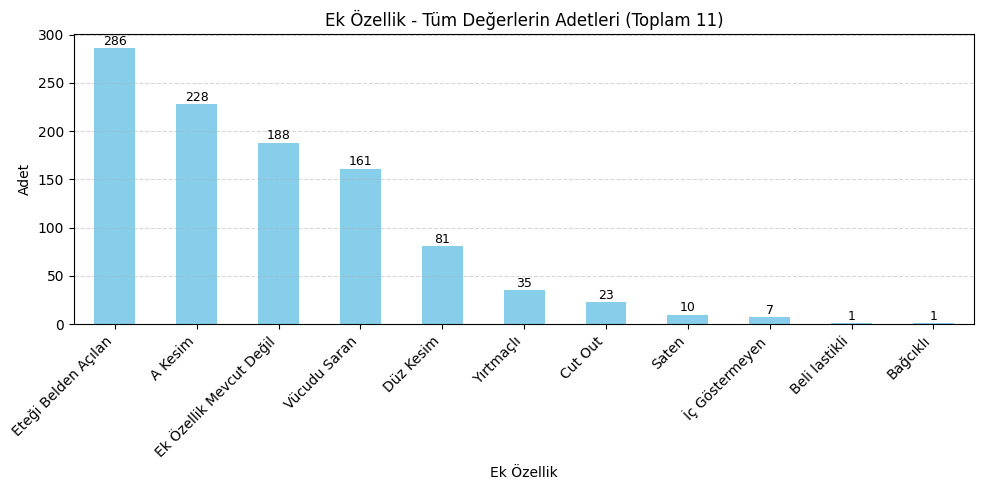

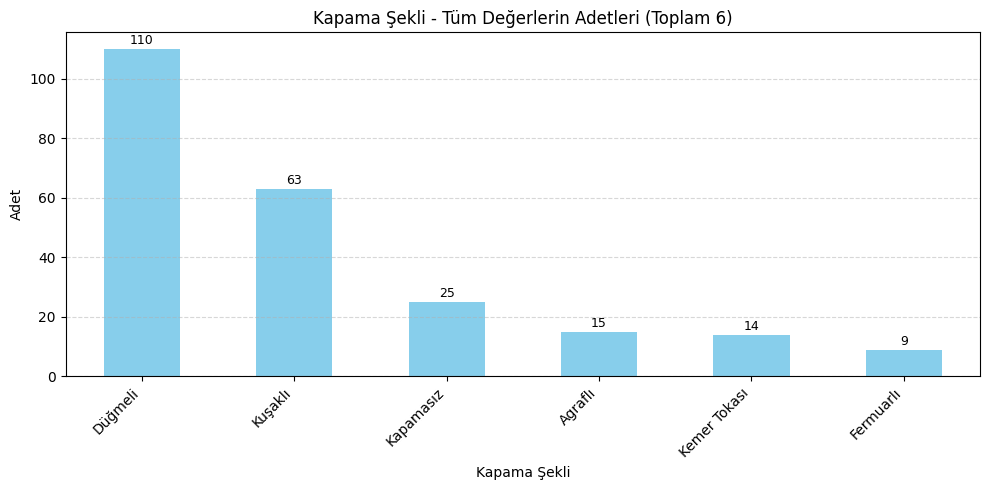

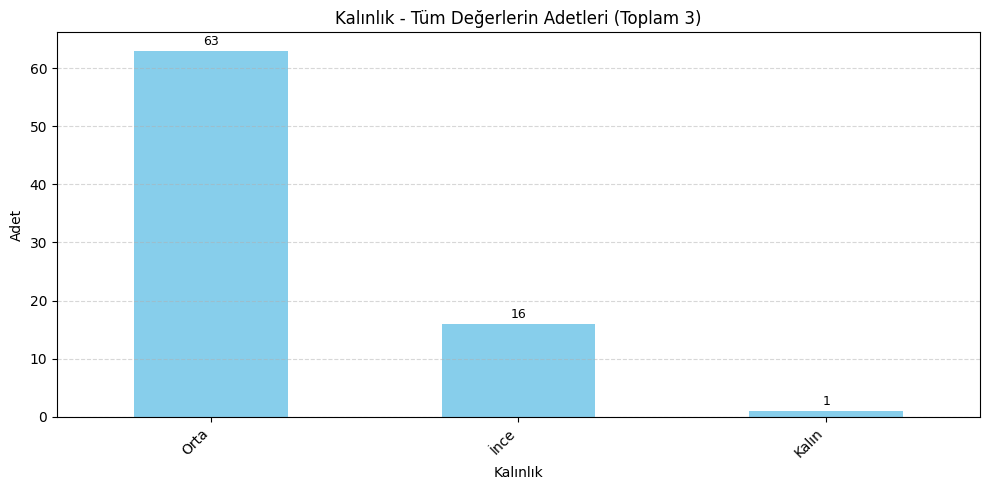

In [23]:
ozellik_grafikleri_tam(df_ust_gogus, kolonlar)